Classification Report:
                        precision    recall  f1-score   support

Flat Head Socket Screw       1.00      0.83      0.91         6
     Sheet Metal Screw       1.00      1.00      1.00         9
 Socket Head Cap Screw       1.00      1.00      1.00         8
            Wood Screw       0.83      1.00      0.91         5

              accuracy                           0.96        28
             macro avg       0.96      0.96      0.95        28
          weighted avg       0.97      0.96      0.96        28



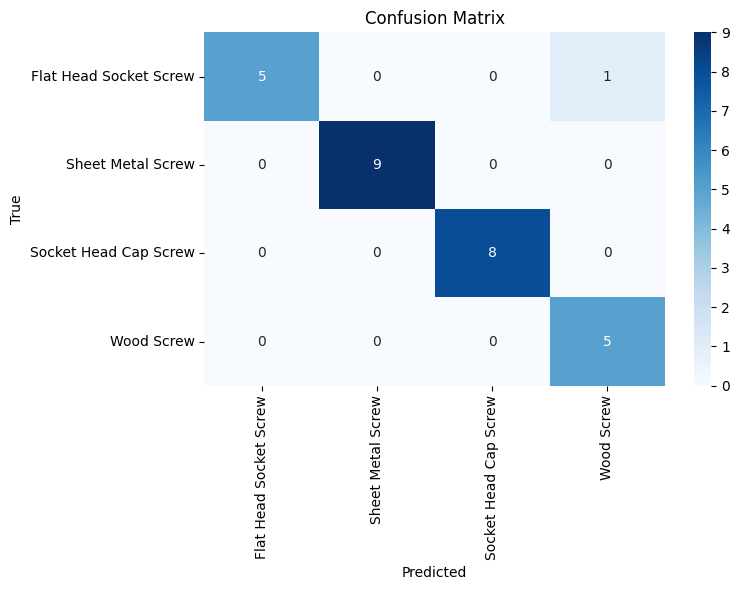

In [2]:
import os
import cv2
from ultralytics import YOLO
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Path to image folders and model
base_dir = r"C:\MS_Studies\2nd Sem\Applied Machine Vision\GitHub\ScrewTypeDetection\New_Test_Images"
model_path = r"C:\MS_Studies\2nd Sem\Applied Machine Vision\GitHub\ScrewTypeDetection\trained_models\yolov11_screwtype_trained.pt"

# Classes (must match your training)
class_names = ['Flat Head Socket Screw', 'Sheet Metal Screw', 'Socket Head Cap Screw', 'Wood Screw']
class_to_idx = {name: i for i, name in enumerate(class_names)}

# Load YOLO model
model = YOLO(model_path)

y_true = []
y_pred = []

# Loop over folders
for class_folder in class_names:
    folder_path = os.path.join(base_dir, class_folder)
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)

            # Inference
            results = model(img, verbose=False)
            boxes = results[0].boxes

            if boxes is not None and len(boxes) > 0:
                # Assume the most confident prediction is the main class
                best_box = boxes[boxes.conf.argmax()]
                predicted_class_idx = int(best_box.cls.item())
            else:
                predicted_class_idx = -1  # No detection

            true_class_idx = class_to_idx[class_folder]
            y_true.append(true_class_idx)
            y_pred.append(predicted_class_idx)

# Filter out images where no class was predicted
y_true_filtered = [yt for yt, yp in zip(y_true, y_pred) if yp != -1]
y_pred_filtered = [yp for yp in y_pred if yp != -1]

# Evaluation
print("Classification Report:")
print(classification_report(y_true_filtered, y_pred_filtered, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true_filtered, y_pred_filtered)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()